In [1]:
from matrix import *
import copy


In [2]:
def permutation(P: list, a: list) -> list:
    res = []
    for i in P:
        res.append(a[i])
    a = res
    return res
    

In [3]:
def reverse_permutation(P: list, a: list) -> list:
    res = []
    for i in range(len(a)):
        for j in range(len(a)):
            if i==P[j]:
                res.append(a[j])
                break
    return res
        

In [4]:
def solve_y(B: vector, A: matrix):
    res = [B.vec[0]]
    for k in range(1, A.length):
        y = B.vec[k]
        for j in range(k):
            y -= A.mlist[k][j]*res[j]
        res.append(y)
    return vector(res)
    

In [5]:
def solve_x(Y: vector, A: matrix):
    res = [Y.vec[-1]/A.mlist[-1][-1]]
    for k in range(A.length-2, -1, -1):
        x = Y.vec[k]
        for j in range(A.length-1, k, -1):
            # print(A.length - j)
            x -= A.mlist[k][j]*res[A.length - j-1]
        x /= A.mlist[k][k]
        res.append(x)
    return vector(res[::-1])

In [6]:
def solve_system(A: matrix, b: vector):
    P = A.LUP()
    b_ = vector(permutation(P, b.vec))
    Y = solve_y(b_, A)
    X = solve_x(Y, A)
    return X
    
        

In [23]:
A = matrix([[-1,  2, -7,  8,  9,  6], 
            [ 5, -9,  5,  1,  1,  1], 
            [ 9,  4,  2,  3,  3, -2], 
            [ 7,  2, -9,  2,  8,  0], 
            [ 4, 10,  6, -3, -7,  6], 
            [ 5, 11,  5,  6,  4,  7]])
            
            
A_test = copy.deepcopy(A)
b = vector([-9, 12, 50, 77, 65, -9])

x = solve_system(A, b)
print(f"x = {x}")
print(r"Ax = ", f"{A_test*x}")

x = [11.31938651957487, -0.9052872326113272, -9.41557917395399, 3.326113278622363, -11.477196286829008, 2.4844611866002952]
Ax =  [-8.999999999999982, 12.000000000000005, 50.00000000000001, 76.99999999999999, 65.0, -8.999999999999979]


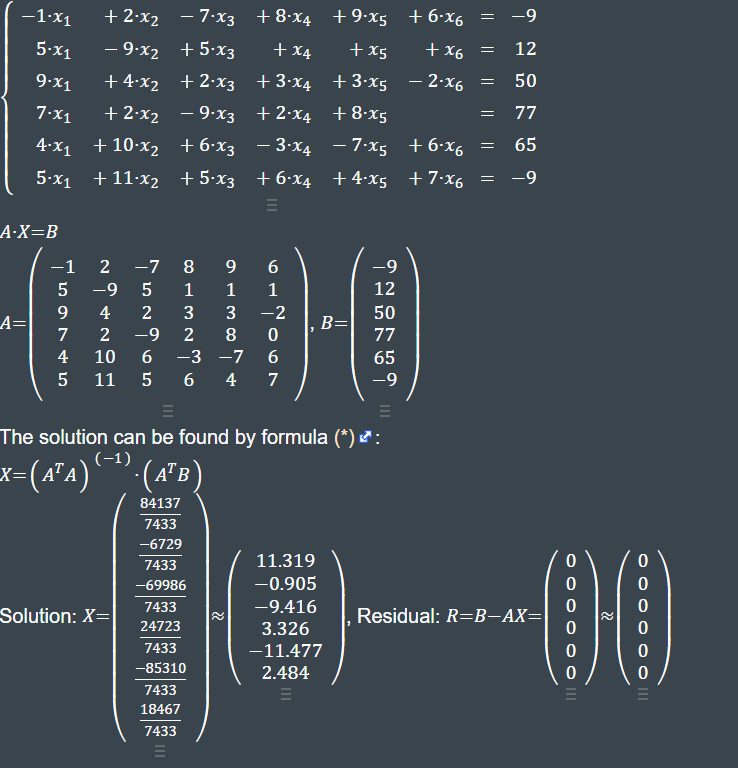